<a href="https://colab.research.google.com/github/claranatalie01/Unsupervised-Learning-Airline-Customer-Value-Analysis-/blob/main/HW_Flight_Dataset_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path = 'drive/MyDrive/flight.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
56066,10333,1/4/2010,1/4/2010,Female,4,guangzhou,guangdong,CN,39.0,3/31/2014,...,1818.0,2616,7/24/2013,252,2.000000,2,0,0.710000,958,0
39747,13154,12/9/2009,4/9/2010,Male,4,shanghai,shanghai,CN,47.0,3/31/2014,...,1122.0,6175,12/11/2013,112,123.200000,249,0,0.762151,4006,1
58388,24984,9/3/2012,11/16/2012,Male,4,changchunshi,jilinsheng,CN,59.0,3/31/2014,...,0.0,1518,11/19/2012,499,3.000000,3,0,1.000000,1926,0
14580,32205,12/5/2011,12/5/2011,Male,4,jieyang,guangdong,CN,47.0,3/31/2014,...,7325.0,33624,1/18/2014,74,19.258065,103,0,0.485226,14583,0
37090,24823,6/26/2012,7/30/2012,Male,4,shunde,guangdong,CN,40.0,3/31/2014,...,263.0,10062,4/27/2013,340,38.714286,118,0,0.531296,3314,0


# 1. EXPLORATORY DATA ANALYSIS

### A

#### Tipe Data

In [ ]:
# Informasi umum dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

untuk FFP_DATE, FIRST_FLIGHT_DATE, LAST_FLIGHT_DATE seharusnya memiliki tipe data 'Date', sisanya sesuai

In [ ]:
# Define the list of date columns
var_date = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']

# Transform the data types to datetime
df[var_date] = df[var_date].applymap(lambda x: pd.to_datetime(x, format = '%m/%d/%Y'))

# Now the specified columns are of datetime data type

In [ ]:
#dataframe after transformation data type to date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
#Pengelompokan kolom berdasarkan jenis
nums = df.select_dtypes(include='number').columns.tolist()
cats = df.select_dtypes(include= ['object']).columns.tolist()

In [ ]:
# Statistik dari setiap kolom numeric
df[nums].describe().apply(lambda x: x.apply('{0:.5f}'.format))

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.00000,62988.00000,62568.00000,62988.00000,62988.00000,62437.00000,62850.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000
mean,31494.50000,4.10216,42.47635,11.83941,10925.08125,5355.37606,5604.02601,17123.87869,176.12010,67.74979,166.03390,0.31978,0.72156,12545.77710,2.72815
std,18183.21371,0.37386,9.88591,14.04947,16339.48615,8109.45015,8703.36425,20960.84462,183.82222,77.51787,123.39718,1.13600,0.18543,20507.81670,7.36416
min,1.00000,4.00000,6.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,15747.75000,4.00000,35.00000,3.00000,2518.00000,1003.00000,780.00000,4747.00000,29.00000,23.37037,79.00000,0.00000,0.61200,2775.00000,0.00000
50%,31494.50000,4.00000,41.00000,7.00000,5700.00000,2800.00000,2773.00000,9994.00000,108.00000,44.66667,143.00000,0.00000,0.71186,6328.50000,0.00000
75%,47241.25000,4.00000,48.00000,15.00000,12831.00000,6574.00000,6845.75000,21271.25000,268.00000,82.00000,228.00000,0.00000,0.80948,14302.50000,1.00000
max,62988.00000,6.00000,110.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000


In [ ]:
# Statistik dari setiap kolom categorical
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62985,60719,59740,62962,62988
unique,2,3234,1165,118,731
top,Male,guangzhou,guangdong,CN,3/31/2014
freq,48134,9386,17509,57748,959


Variabel WORK_CITY dan WORK_PROVINCE memiliki unique value yang sangat besar, WORK_COUNTRY memiliki data yang imbalanced dimana nilai "CN" sangat mendominasi. ketiga variabel tersebut kemungkinan akan di drop dengan alasan di atas.

In [ ]:
# Statistik dari setiap kolom date

df[var_date].describe()

<ipython-input-10-bbe7c0018fe7>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[var_date].describe()
<ipython-input-10-bbe7c0018fe7>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[var_date].describe()
<ipython-input-10-bbe7c0018fe7>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[var_date].describe()


,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME
count,62988,62988,62988
unique,3068,3406,1
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00
freq,184,96,62988
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00


Variabel LOAD_TIME memiliki data yang homogen, sehingga variabel ini hanya akan dipakai untuk membuat feature extraction, tidak untuk dimasukkan dalam analisis

#### Missing Value

In [ ]:
# Copy dataframe menjadi df_clean
df_clean = df.copy()

In [ ]:
# Missing values
missing_values = df_clean.isna().sum()
total_rows = len(df_clean)

missing_percentage = (missing_values / total_rows) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_info)

                   Missing Values  Percentage
MEMBER_NO                       0    0.000000
FFP_DATE                        0    0.000000
FIRST_FLIGHT_DATE               0    0.000000
GENDER                          3    0.004763
FFP_TIER                        0    0.000000
WORK_CITY                    2269    3.602273
WORK_PROVINCE                3248    5.156538
WORK_COUNTRY                   26    0.041278
AGE                           420    0.666794
LOAD_TIME                       0    0.000000
FLIGHT_COUNT                    0    0.000000
BP_SUM                          0    0.000000
SUM_YR_1                      551    0.874770
SUM_YR_2                      138    0.219089
SEG_KM_SUM                      0    0.000000
LAST_FLIGHT_DATE                0    0.000000
LAST_TO_END                     0    0.000000
AVG_INTERVAL                    0    0.000000
MAX_INTERVAL                    0    0.000000
EXCHANGE_COUNT                  0    0.000000
avg_discount                    0 

Imputasi data

In [ ]:
# Menghitung rata-rata kolom 'AGE'
median_AGE = df_clean['AGE'].median()

# Mengisi missing value dalam kolom 'AGE' dengan rata-rata
df_clean['AGE'].fillna(median_AGE, inplace=True)

In [ ]:
# Menghitung modus dari kolom 'gender'
mode_gender = df_clean['GENDER'].mode()[0]

# Mengisi missing value dalam kolom 'gender' dengan modus
df_clean['GENDER'].fillna(mode_gender, inplace=True)

In [ ]:
# Menghitung rata-rata kolom 'SUM YR'
median_Y1 = df_clean['SUM_YR_1'].median()
median_Y2 = df_clean['SUM_YR_2'].median()


# Mengisi missing value dalam kolom 'sum_yr_1' dan 'sum_yr_2' dengan median
df_clean['SUM_YR_1'].fillna(median_Y1, inplace=True)
df_clean['SUM_YR_2'].fillna(median_Y2, inplace=True)

In [ ]:
#cek setelah imputasi
df_clean.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  0
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Untuk variabel 'WORK' akan kami biarkan karena tidak akan kami pakai dalam analisis (di drop)

Duplikasi Data

In [ ]:
# Menghitung jumlah data yang duplikat
duplicate_count = df_clean.duplicated().sum()
print("Jumlah data yang duplikat:", duplicate_count)

Jumlah data yang duplikat: 0


### B

## Univariate

In [ ]:
# #Boxplot fitur numerical
# plt.figure(figsize=(10,15))
# for i in range (0, len(nums)):
#     plt.subplot(12, 2, i+1)
#     sns.boxplot (x=df_clean[nums [i]], color= 'lightgreen')
#     plt.tight_layout()

# plt.show()

MEMBER_NO, AGE, avg_discount, MAX_INTERVAL dan LAST_TO_END memiliki distribusi yang cenderung normal atau skew sedikit, sisanya sangat skew dan mengandung banyak outliers extreme

In [ ]:
# # histogram plot untuk data numerical
# plt.figure(figsize=(13,5))
# for i in range(0, len(nums)):
#     plt.subplot(2, 4, i+1)
#     sns.histplot(x=df_clean[nums[i]], kde=True, color='green')
#     plt.xlabel(nums[i])
#     plt.tight_layout()

MEMBER_NO berbentuk seperti itu karena semua data memiliki nilai unique, AGE cenderung berdistribusi cukup normal, sisanya skewed. Untuk MEMBER_NO akan dipertimbangkan untuk di drop karena tidak berisi informasi yang penting.

In [ ]:
# import matplotlib.ticker as mtick
# plt.figure(figsize=(20, 18))
# for i, col in enumerate(cats, 1):
#     plt.subplot(4, 3, i)
#     percentages = (df_clean[col].value_counts() / len(df) * 100)[:10]
#     ax = sns.barplot(x=percentages.index, y=percentages.values, color='deepskyblue')
#     ax.set_title(col)
#     ax.set_ylabel('Percentage')
#     ax.set_ylim(0, 100)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#     plt.xticks(rotation=30)

#     for p, percentage in zip(ax.patches, percentages.values):
#         height = p.get_height()
#         ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format(percentage), ha='center')

# plt.tight_layout()
# plt.show()

Untuk variabel WORK_COUNTRY sangat imbalanced class (mayoritas penerbangan ada di CHINA), sisanya distribusinya cukup merata. Untuk LAST_FLIGHT_DATE dipertimbangkan untuk di drop karena sulit di transformasi karena banyaknya format yang tidak sesuai standard.

### C

## Multivariate

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df_clean.corr(), cmap='Blues', annot=True,  fmt='.2f')
# #perlu make sure multi kolinearitas (hub antar var x)

Variabel BP_SUM memiliki korelasi yang sangat tinggi dengan 3 variabel lainnya yaitu SUM_YR_1, SUM_YR_2 dan SEG_KM_SUM sehingga dipertimbangkan untuk di drop. Namun, sisanya akan coba kami masukan dalam pilihan untuk analisis.

# 2. FEATURE SELECTION

Deleting Unrelevant Data

In [ ]:
df_clean.drop(columns=['BP_SUM', 'MEMBER_NO','WORK_CITY','WORK_PROVINCE', 'WORK_COUNTRY'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   GENDER             62988 non-null  object        
 3   FFP_TIER           62988 non-null  int64         
 4   AGE                62988 non-null  float64       
 5   LOAD_TIME          62988 non-null  datetime64[ns]
 6   FLIGHT_COUNT       62988 non-null  int64         
 7   SUM_YR_1           62988 non-null  float64       
 8   SUM_YR_2           62988 non-null  float64       
 9   SEG_KM_SUM         62988 non-null  int64         
 10  LAST_FLIGHT_DATE   62988 non-null  object        
 11  LAST_TO_END        62988 non-null  int64         
 12  AVG_INTERVAL       62988 non-null  float64       
 13  MAX_INTERVAL       62988 non-null  int64         
 14  EXCHAN

**HANDLE OUTLIERS**

In [ ]:
# Handle Outliers
print(f'Number of rows before removing outlier: {len(df)}')

filtered = np.array([True] * len(df))
for f in ['LAST_TO_END','SEG_KM_SUM', 'FLIGHT_COUNT', 'SUM_YR_1','FFP_TIER','Point_NotFlight']:
    Q1 = df_clean[f].quantile(0.25)
    Q3 = df_clean[f].quantile(0.75)
    iqr = Q3 - Q1
    b_thresh = Q1 - (1.5 * iqr)
    u_thresh = Q3 + (1.5 * iqr)

    filtered = ((df_clean[f] >= b_thresh) & (df_clean[f] <= u_thresh))
df = df_clean[filtered]

print(f'Number of rows after removing outlier: {len(df)}')

Number of rows before removing outlier: 62988
Number of rows after removing outlier: 51699


**FEATURE ENCODING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 43 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           51699 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  51699 non-null  datetime64[ns]
 2   GENDER             51699 non-null  object        
 3   FFP_TIER           51699 non-null  int64         
 4   AGE                51699 non-null  float64       
 5   LOAD_TIME          51699 non-null  datetime64[ns]
 6   FLIGHT_COUNT       51699 non-null  int64         
 7   SUM_YR_1           51699 non-null  float64       
 8   SUM_YR_2           51699 non-null  float64       
 9   SEG_KM_SUM         51699 non-null  int64         
 10  LAST_FLIGHT_DATE   51699 non-null  object        
 11  LAST_TO_END        51699 non-null  int64         
 12  AVG_INTERVAL       51699 non-null  float64       
 13  MAX_INTERVAL       51699 non-null  int64         
 14  EXCHA

In [ ]:
#OHE GENDER
encodee = ['GENDER']

for e in encodee:
    ohe= pd.get_dummies(df[e], prefix=e)
    df = df.join(ohe)

df = df.drop(encodee, axis=1)

In [ ]:
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,GENDER_Female,GENDER_Male
43,2010-05-04,2010-05-14,5,51.0,2014-03-31,46,53523.0,50287.0,256766,3/19/2014,13,15.888889,54,0,0.764737,191878,2,0,1
62,2010-06-09,2010-06-27,6,52.0,2014-03-31,84,69796.0,118928.0,186821,3/26/2014,6,8.734940,69,1,0.938031,204668,2,0,1
70,2012-08-15,2012-08-15,6,33.0,2014-03-31,18,19100.0,46215.0,209911,1/30/2014,62,31.352941,141,2,0.811871,182497,2,0,1
75,2010-08-14,2010-12-29,6,45.0,2014-03-31,22,24615.0,105814.0,170406,3/10/2014,22,32.666667,133,0,0.992454,208960,1,1,0
94,2010-04-13,2013-02-21,5,41.0,2014-03-31,12,12500.0,110100.0,146784,2/8/2014,53,32.000000,53,0,1.059167,208118,2,0,1


In [ ]:
#delete hasil OHE
df.drop(columns=['GENDER_Female'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 43 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           51699 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  51699 non-null  datetime64[ns]
 2   FFP_TIER           51699 non-null  int64         
 3   AGE                51699 non-null  float64       
 4   LOAD_TIME          51699 non-null  datetime64[ns]
 5   FLIGHT_COUNT       51699 non-null  int64         
 6   SUM_YR_1           51699 non-null  float64       
 7   SUM_YR_2           51699 non-null  float64       
 8   SEG_KM_SUM         51699 non-null  int64         
 9   LAST_FLIGHT_DATE   51699 non-null  object        
 10  LAST_TO_END        51699 non-null  int64         
 11  AVG_INTERVAL       51699 non-null  float64       
 12  MAX_INTERVAL       51699 non-null  int64         
 13  EXCHANGE_COUNT     51699 non-null  int64         
 14  avg_d

Gender female di drop karena telah diwakili oleh male, male dipakai karena merupakan data yang lebih mayoritas

**FEATURE ENGINEERING**

In [ ]:
# Mengekstraksi tahun pada FIRST_FLIGHT_DATE
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['FIRST_FLIGHT:YEAR'] = df['FIRST_FLIGHT_DATE'].dt.year

In [ ]:
# Mengekstraksi tahun pada LAST_FLIGHT_DATE
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT:YEAR'] = df['LAST_FLIGHT_DATE'].dt.year

In [ ]:
# menambahkan feature TOTAL FLIGHT YEARS untuk melihat hubungan dengan FLIGHT COUNT, EXCHANGE COUNT, AVG DISCOUNT, POINTS_SUM, dan POINT_NOTFLIGHT
df['TOTAL_FLIGHT_YEARS'] = df['LAST_FLIGHT:YEAR'] - df['FIRST_FLIGHT:YEAR']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 43 to 62987
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FFP_DATE            51699 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE   51699 non-null  datetime64[ns]
 2   FFP_TIER            51699 non-null  int64         
 3   AGE                 51699 non-null  float64       
 4   LOAD_TIME           51699 non-null  datetime64[ns]
 5   FLIGHT_COUNT        51699 non-null  int64         
 6   SUM_YR_1            51699 non-null  float64       
 7   SUM_YR_2            51699 non-null  float64       
 8   SEG_KM_SUM          51699 non-null  int64         
 9   LAST_FLIGHT_DATE    51367 non-null  datetime64[ns]
 10  LAST_TO_END         51699 non-null  int64         
 11  AVG_INTERVAL        51699 non-null  float64       
 12  MAX_INTERVAL        51699 non-null  int64         
 13  EXCHANGE_COUNT      51699 non-null  int64    

In [ ]:
# Mengekstraksi tahun pada FFP_DATE
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FFP:YEAR'] = df['FFP_DATE'].dt.year

In [ ]:
# Mengekstraksi tahun pada LOAD_TIME
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LOAD_TIME:YEAR'] = df['LOAD_TIME'].dt.year

In [ ]:
# menambahkan feature durasi lamanya join FFP sampai saat data diambil
df['FFP_JOIN_YEARS'] = df['LOAD_TIME:YEAR'] - df['FFP:YEAR']

In [ ]:
# menambahkan feature durasi lamanya jarak terakhir kali terbang sampai saat data diambil
df['RECENT_FLIGHT_YEARS'] = df['LOAD_TIME:YEAR'] - df['LAST_FLIGHT:YEAR']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 43 to 62987
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FFP_DATE             51699 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE    51699 non-null  datetime64[ns]
 2   FFP_TIER             51699 non-null  int64         
 3   AGE                  51699 non-null  float64       
 4   LOAD_TIME            51699 non-null  datetime64[ns]
 5   FLIGHT_COUNT         51699 non-null  int64         
 6   SUM_YR_1             51699 non-null  float64       
 7   SUM_YR_2             51699 non-null  float64       
 8   SEG_KM_SUM           51699 non-null  int64         
 9   LAST_FLIGHT_DATE     51367 non-null  datetime64[ns]
 10  LAST_TO_END          51699 non-null  int64         
 11  AVG_INTERVAL         51699 non-null  float64       
 12  MAX_INTERVAL         51699 non-null  int64         
 13  EXCHANGE_COUNT       51699 non

**FEATURE SELECTION**

In [ ]:
#delete fitur yang tidak diperlukan setelah extraction
df.drop(columns=['FFP_DATE', 'FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE', 'FIRST_FLIGHT:YEAR', 'LAST_FLIGHT:YEAR','FFP:YEAR', 'LOAD_TIME:YEAR'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 43 to 62987
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFP_TIER             51699 non-null  int64  
 1   AGE                  51699 non-null  float64
 2   FLIGHT_COUNT         51699 non-null  int64  
 3   SUM_YR_1             51699 non-null  float64
 4   SUM_YR_2             51699 non-null  float64
 5   SEG_KM_SUM           51699 non-null  int64  
 6   LAST_TO_END          51699 non-null  int64  
 7   AVG_INTERVAL         51699 non-null  float64
 8   MAX_INTERVAL         51699 non-null  int64  
 9   EXCHANGE_COUNT       51699 non-null  int64  
 10  avg_discount         51699 non-null  float64
 11  Points_Sum           51699 non-null  int64  
 12  Point_NotFlight      51699 non-null  int64  
 13  GENDER_Male          51699 non-null  uint8  
 14  TOTAL_FLIGHT_YEARS   51367 non-null  float64
 15  FFP_JOIN_YEARS       51699 non-null

In [ ]:
df.isna().sum()

FFP_TIER                 0
AGE                      0
FLIGHT_COUNT             0
SUM_YR_1                 0
SUM_YR_2                 0
SEG_KM_SUM               0
LAST_TO_END              0
AVG_INTERVAL             0
MAX_INTERVAL             0
EXCHANGE_COUNT           0
avg_discount             0
Points_Sum               0
Point_NotFlight          0
GENDER_Male              0
TOTAL_FLIGHT_YEARS     332
FFP_JOIN_YEARS           0
RECENT_FLIGHT_YEARS    332
dtype: int64

In [ ]:
#hapus data yang missing
df= df.dropna(subset=['TOTAL_FLIGHT_YEARS', 'RECENT_FLIGHT_YEARS'])

In [ ]:
df.isna().sum()

FFP_TIER               0
AGE                    0
FLIGHT_COUNT           0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
GENDER_Male            0
TOTAL_FLIGHT_YEARS     0
FFP_JOIN_YEARS         0
RECENT_FLIGHT_YEARS    0
dtype: int64

17 Fitur di atas bisa dipakai untuk clustering

#### Memilih 6 fitur untuk clustering

Menggunakan konsep RFM, fitur yang termasuk di dalamnya yaitu : <br>
**Recency** : FFP_JOIN_YEARS dan LAST_TO_END <br>
**Frequency** : SEG_KM_SUM, AVG_INTERVAL dan FLIGHT_COUNT <br>
**Monetary** :  SUM_YR_1


In [ ]:
#6 pilihan dalam percobaan pertama
df_first = df.copy()
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51367 entries, 43 to 62987
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFP_TIER             51367 non-null  int64  
 1   AGE                  51367 non-null  float64
 2   FLIGHT_COUNT         51367 non-null  int64  
 3   SUM_YR_1             51367 non-null  float64
 4   SUM_YR_2             51367 non-null  float64
 5   SEG_KM_SUM           51367 non-null  int64  
 6   LAST_TO_END          51367 non-null  int64  
 7   AVG_INTERVAL         51367 non-null  float64
 8   MAX_INTERVAL         51367 non-null  int64  
 9   EXCHANGE_COUNT       51367 non-null  int64  
 10  avg_discount         51367 non-null  float64
 11  Points_Sum           51367 non-null  int64  
 12  Point_NotFlight      51367 non-null  int64  
 13  GENDER_Male          51367 non-null  uint8  
 14  TOTAL_FLIGHT_YEARS   51367 non-null  float64
 15  FFP_JOIN_YEARS       51367 non-null

In [ ]:
#menentukan 6 variabel percobaan pertama
columns6 = ['Point_NotFlight', 'LAST_TO_END','SEG_KM_SUM', 'FFP_TIER', 'FLIGHT_COUNT', 'SUM_YR_1']
df_first = df_first[columns6]
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51367 entries, 43 to 62987
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Point_NotFlight  51367 non-null  int64  
 1   LAST_TO_END      51367 non-null  int64  
 2   SEG_KM_SUM       51367 non-null  int64  
 3   FFP_TIER         51367 non-null  int64  
 4   FLIGHT_COUNT     51367 non-null  int64  
 5   SUM_YR_1         51367 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


In [ ]:
import pandas as pd

# Assuming your DataFrame is called "df"
median_value = df_first['SUM_YR_1'].median()

# Fill missing values with the median
df_first['SUM_YR_1'].fillna(median_value, inplace=True)
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51367 entries, 43 to 62987
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Point_NotFlight  51367 non-null  int64  
 1   LAST_TO_END      51367 non-null  int64  
 2   SEG_KM_SUM       51367 non-null  int64  
 3   FFP_TIER         51367 non-null  int64  
 4   FLIGHT_COUNT     51367 non-null  int64  
 5   SUM_YR_1         51367 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


#### df1 IS THE ORIGINAL DATASET WITH 6 FEATURE


In [ ]:
df1 = df_first.copy()

STANDARISASI

In [ ]:
from sklearn.preprocessing import RobustScaler
nums = df_first.columns
X = df_first[nums].values
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)
df_6 = pd.DataFrame(data=X_robust, columns=nums)

In [ ]:
df_6.describe()

,Point_NotFlight,LAST_TO_END,SEG_KM_SUM,FFP_TIER,FLIGHT_COUNT,SUM_YR_1
count,51367.000000,51367.000000,51367.000000,51367.000000,51367.000000,51367.000000
mean,0.232776,0.259877,0.364400,0.053887,0.384112,0.356497
std,0.536734,0.718883,1.076808,0.264767,1.057628,1.163607
min,0.000000,-0.465649,-0.631996,0.000000,-0.444444,-0.561404
25%,0.000000,-0.332061,-0.330471,0.000000,-0.333333,-0.353838
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.667939,0.669529,0.000000,0.666667,0.646162
max,2.000000,2.320611,18.349200,2.000000,18.666667,27.467544


CLUSTERING

<Axes: >

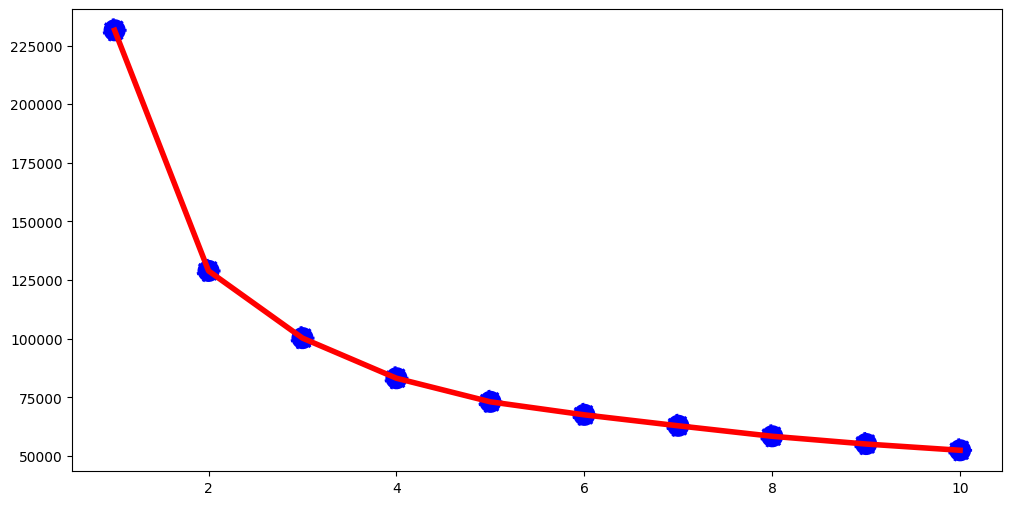

In [ ]:
# K-means
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
    kmeans.fit(df_6)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))

sns.lineplot(x=range(1, 11), y=inertia, color='red', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='blue',  linestyle='--')


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 6):
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=0, n_init=10).fit(df_6)
    preds = clusterer.predict(df_6)

    score = silhouette_score(df_6, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is: {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is: 0.5531320028676043
For n_clusters = 3. The average silhouette_score is: 0.4006747896887515
For n_clusters = 4. The average silhouette_score is: 0.3265771934616015
For n_clusters = 5. The average silhouette_score is: 0.3214297619294851


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_6.values)
df_6['cluster'] = kmeans.labels_
df1['cluster'] = kmeans.labels_

df_6.head()

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df_6'
data = df_6.drop('cluster', axis=1)  # Remove the 'cluster' column from the data

# Create a PCA object with the desired number of components
num_components = 2  # Number of principal components to retain
pca = PCA(n_components=num_components)

# Apply PCA to the data
pca_result = pca.fit_transform(data)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])  # Replace 'PC1' and 'PC2' with appropriate column names

# Concatenate the PCA results with the 'cluster' column
final_df = pd.concat([pca_df, df_6['cluster']], axis=1)

# Print the final DataFrame
print(final_df.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_df' is your DataFrame containing the data and cluster labels

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Customize the scatter plot
sns.scatterplot(
    x="PC1", y="PC2",
    hue="cluster",
    data=final_df,
    palette=['blue', 'red'],
    edgecolor='black',
    linestyle='--',
    s=80,
    ax=ax
)

# Add labels and title
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Scatter Plot of PC1 and PC2")

# Display the plot
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame containing the data with cluster labels

# Group the data based on the 'cluster' column and calculate the average of the other columns
grouped_df = df1.groupby('cluster').mean()

# Print the average of the other columns within each cluster
print("Average of other columns within each cluster:")
print(grouped_df)


Kesimpulan:
1. Cluster 0 memiliki nilai yang lebih tinggi pada hampir semua variabel dibandingkan dengan Cluster 1. Pelanggan dalam Cluster 0 cenderung lebih aktif dalam melakukan penerbangan dengan jumlah penerbangan yang lebih tinggi, jarak perjalanan yang lebih jauh, dan jumlah poin yang dikumpulkan yang lebih besar. Mereka juga memiliki tingkat keanggotaan yang lebih tinggi.

Rekomendasi Bisnis:
1. Meningkatkan Keterlibatan Pelanggan dalam Cluster 0:
   - Program Loyalitas Lebih Lanjut: Perusahaan dapat meluncurkan program loyalitas tambahan yang dirancang khusus untuk pelanggan dalam Cluster 0. Program ini dapat mencakup keuntungan eksklusif, penghargaan khusus, atau penawaran diskon yang lebih menarik untuk mendorong mereka untuk tetap aktif dan meningkatkan tingkat keanggotaan.
   - Personalisasi Pengalaman Pelanggan: Perusahaan dapat menggunakan data yang ada untuk memahami preferensi dan kebutuhan pelanggan dalam Cluster 0. Dengan mempersonalisasi pengalaman mereka, seperti penawaran spesial yang disesuaikan, rekomendasi penerbangan yang relevan, atau layanan yang disesuaikan, perusahaan dapat meningkatkan kepuasan pelanggan dan memperkuat keterikatan mereka.

2. Meningkatkan Keterlibatan Pelanggan dalam Cluster 1:
   - Program Stimulus Penerbangan: Perusahaan dapat meluncurkan program stimulus penerbangan yang ditujukan khusus untuk pelanggan dalam Cluster 1. Program ini dapat mencakup penawaran diskon, bonus poin, atau hadiah khusus yang dapat mendorong mereka untuk melakukan lebih banyak penerbangan dan meningkatkan aktivitas mereka.
   - Komunikasi yang Terarah: Perusahaan perlu meningkatkan komunikasi dengan pelanggan dalam Cluster 1 untuk meningkatkan kesadaran tentang penawaran dan manfaat yang ditawarkan. Komunikasi yang terarah melalui saluran yang relevan, seperti email, pesan teks, atau media sosial, dapat membantu membangun keterlibatan yang lebih baik dan mendorong pelanggan untuk melakukan penerbangan lebih sering.
